      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      

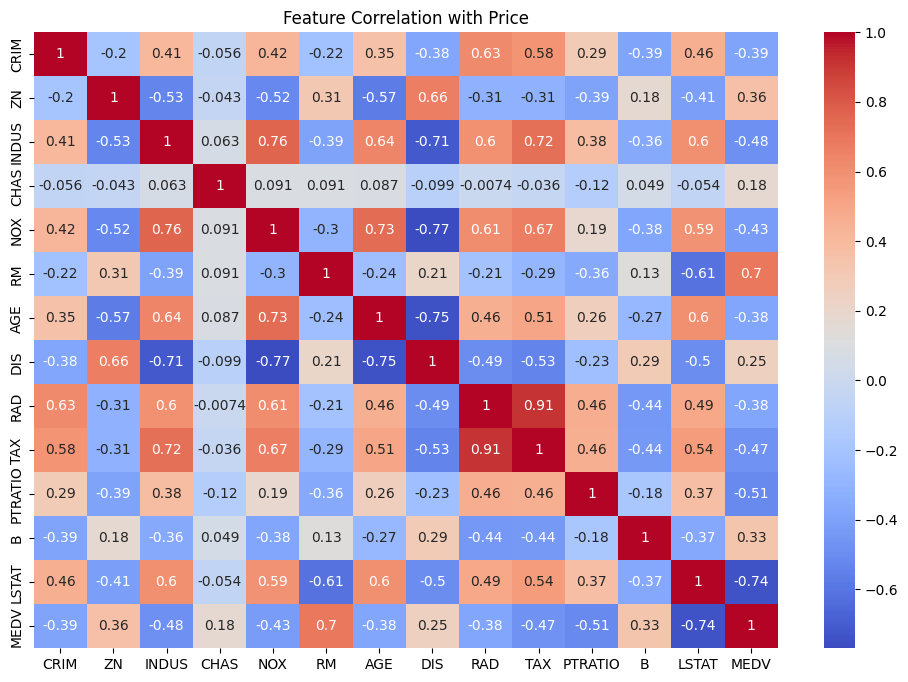

--- Linear Regression ---
RMSE: 4.93
MAE:  3.19
R2:   0.67

--- Random Forest Regression ---
RMSE: 2.81
MAE:  2.04
R2:   0.89



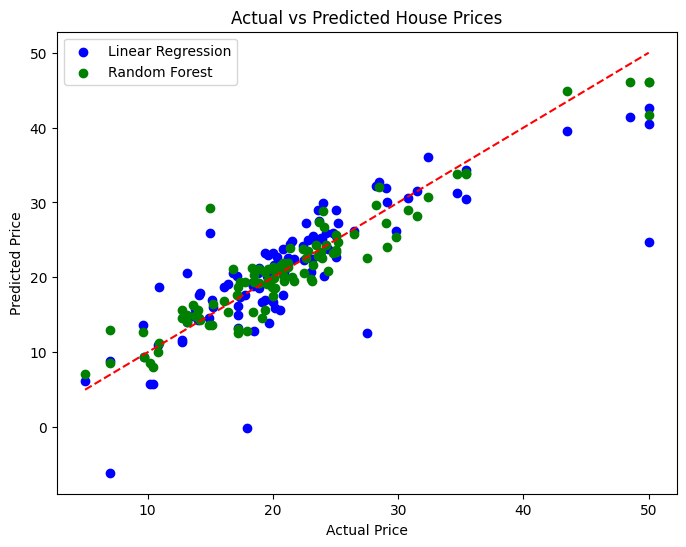

In [3]:
# House Price Prediction Project
# Supervised ML | Regression | Data Preprocessing

# ---------------------------
# 1️⃣ Import Libraries
# ---------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ---------------------------
# 2️⃣ Load Dataset
# ---------------------------
data = pd.read_csv("Boston-house-price-data.csv") 
# Replace housing.csv with the correct filename if different

# Preview Data
print(data.head())
print(data.shape)

# ---------------------------
# 3️⃣ Data Exploration
# ---------------------------
print(data.info())
print(data.describe())

# Visualize correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Price")
plt.show()

# ---------------------------
# 4️⃣ Features & Target
# ---------------------------
# MEDV is the price column
X = data.drop("MEDV", axis=1)
y = data["MEDV"]

# ---------------------------
# 5️⃣ Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# 6️⃣ Feature Scaling
# ---------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# 7️⃣ Train Models
# ---------------------------
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # works well even without scaling
y_pred_rf = rf_model.predict(X_test)

# ---------------------------
# 8️⃣ Evaluation
# ---------------------------
def evaluate_model(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"--- {name} ---")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE:  {mae:.2f}")
    print(f"R2:   {r2:.2f}\n")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")

# ---------------------------
# 9️⃣ Plot Predictions vs Actual
# ---------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, color="blue", label="Linear Regression")
plt.scatter(y_test, y_pred_rf, color="green", label="Random Forest")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()
